In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
Airlines = pd.read_csv('EastWestAirlines.csv')

In [8]:
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [9]:
Airlines.shape

(3999, 12)

In [11]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [12]:
EWA = Airlines.copy()

In [13]:
EWA

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [14]:
EWA[EWA.duplicated()].shape

(0, 12)

In [15]:
EWA.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

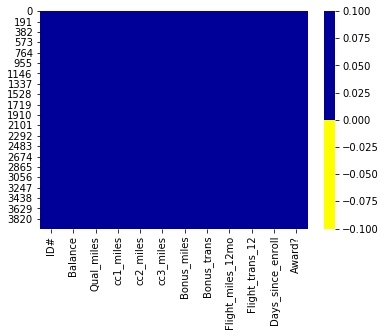

In [16]:
cols = EWA.columns
colours = ['#ffff00','#000099'] # Specify the colours - yellow is missing, blue is not missing.
sns.heatmap(EWA[cols].isnull(), cmap=sns.color_palette(colours))

## Hierarchical Clustering

In [28]:
# Normalization Function
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [30]:
# Normalized data frame (Considering the numerical part of data)
df_norm = norm_func(EWA.iloc[:,0:])

In [31]:
df_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


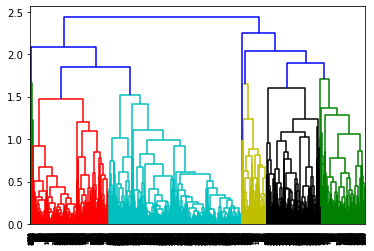

In [32]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [33]:
# Create Cluster
hc=AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage='single')

In [35]:
# Save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns =['Clusters'])

In [36]:
df_norm['h_clusterid']= hc.labels_

In [37]:
df_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1


In [38]:
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [39]:
df_norm.groupby('h_clusterid').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
h_clusterid,,,,,,,,,,,,
0,0.433666,0.056903,0.021530,0.415709,0.00777,0.004561,0.109511,0.182967,0.027169,0.048406,0.557663,1.0
1,0.540341,0.035081,0.007858,0.176330,0.00695,0.002184,0.038788,0.106314,0.007343,0.012311,0.460411,0.0
2,0.896766,0.093917,0.044851,0.000000,0.00000,0.000000,0.272879,1.000000,1.000000,1.000000,0.165300,1.0


In [40]:
Airlines['h_clusterid']= hc.labels_

In [41]:
Airlines.groupby('h_clusterid').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
h_clusterid,,,,,,,,,,,,
0,1744.335811,97010.442568,240.020946,2.662838,1.015541,1.018243,28876.327703,15.735135,837.258108,2.565541,4627.259459,1
1,2173.169182,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0
2,3606.000000,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1


In [42]:
Airlines.groupby('h_clusterid').agg(['count'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,count,count,count,count,count,count,count,count,count,count,count,count
h_clusterid,,,,,,,,,,,,
0,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480
1,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518
2,1,1,1,1,1,1,1,1,1,1,1,1


### K-Means Clustering

In [43]:
from sklearn.cluster import KMeans

In [44]:
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [45]:
EWA1 = Airlines.copy()

In [46]:
EWA1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_EWA1 = scaler.fit_transform(EWA1.iloc[:,0:])

In [48]:
scaler_EWA1

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01,  7.65276428e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01,  7.65276428e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01,  7.65276428e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -1.30391927e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  7.65276428e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  7.65276428e-01]])

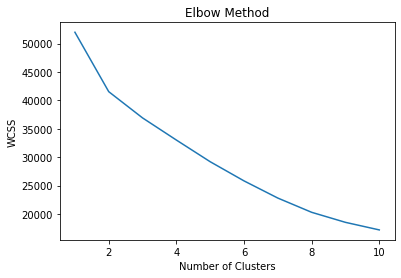

In [49]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, random_state= 0)
    kmeans.fit(scaler_EWA1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
Cluster_new = KMeans(3, random_state=42)
Cluster_new.fit(scaler_EWA1)

KMeans(n_clusters=3, random_state=42)

In [51]:
Cluster_new.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [53]:
EWA1['Clusterid_new'] = Cluster_new.labels_

In [54]:
EWA1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,Clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [55]:
Cluster_new.cluster_centers_

array([[ 1.59928150e-01, -1.88927814e-01, -7.76688939e-02,
        -3.09795413e-01, -9.19922546e-04, -4.38410079e-02,
        -3.43076664e-01, -3.07081175e-01, -2.01026022e-01,
        -2.27521447e-01, -1.68731241e-01, -7.66919299e-01,
         7.65276428e-01],
       [-3.61735004e-01,  1.60597536e+00,  7.82556269e-01,
         3.75978971e-01,  1.33996127e-01,  8.35911769e-02,
         1.10009653e+00,  1.82906676e+00,  3.23295900e+00,
         3.61690669e+00,  4.07573652e-01,  9.72584166e-01,
        -9.49200006e-01],
       [-2.35073018e-01,  1.29093996e-01,  3.76470307e-02,
         4.96300653e-01, -1.52798205e-02,  6.64036305e-02,
         4.63413444e-01,  3.08330735e-01, -5.48043470e-02,
        -5.67121218e-02,  2.44743454e-01,  1.22335244e+00,
        -1.22341742e+00]])

In [56]:
EWA1.groupby('Clusterid_new').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Clusterid_new,,,,,,,,,,,,,
0,2199.737382,54592.424703,83.997948,1.633976,1.014362,1.003693,8871.95158,8.658186,179.072630,0.512105,3771.867870,0.000000,1.000000
1,1594.982857,235424.325714,749.474286,2.577143,1.034286,1.028571,43709.92000,29.165714,4986.308571,15.091429,4960.148571,0.840000,0.171429
2,1742.884643,86583.066330,173.361932,2.741889,1.012257,1.025234,28328.80894,14.558039,382.666907,1.156453,4621.521990,0.961788,0.038212


# Conclusion

## Hierarchical Clustering

In [57]:
Airlines.groupby('h_clusterid').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
h_clusterid,,,,,,,,,,,,
0,1744.335811,97010.442568,240.020946,2.662838,1.015541,1.018243,28876.327703,15.735135,837.258108,2.565541,4627.259459,1
1,2173.169182,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0
2,3606.000000,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1


In [58]:
Airlines.groupby('h_clusterid').agg(['count'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,count,count,count,count,count,count,count,count,count,count,count,count
h_clusterid,,,,,,,,,,,,
0,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480
1,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518
2,1,1,1,1,1,1,1,1,1,1,1,1


## KMeans Clustering

In [60]:
EWA1.groupby('Clusterid_new').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Clusterid_new,,,,,,,,,,,,,
0,2199.737382,54592.424703,83.997948,1.633976,1.014362,1.003693,8871.95158,8.658186,179.072630,0.512105,3771.867870,0.000000,1.000000
1,1594.982857,235424.325714,749.474286,2.577143,1.034286,1.028571,43709.92000,29.165714,4986.308571,15.091429,4960.148571,0.840000,0.171429
2,1742.884643,86583.066330,173.361932,2.741889,1.012257,1.025234,28328.80894,14.558039,382.666907,1.156453,4621.521990,0.961788,0.038212


In [61]:
EWA1.groupby('Clusterid_new').agg(['count'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
,count,count,count,count,count,count,count,count,count,count,count,count,count
Clusterid_new,,,,,,,,,,,,,
0,2437,2437,2437,2437,2437,2437,2437,2437,2437,2437,2437,2437,2437
1,175,175,175,175,175,175,175,175,175,175,175,175,175
2,1387,1387,1387,1387,1387,1387,1387,1387,1387,1387,1387,1387,1387


### We will select Kmeans clustering since in hierarchical all data is gathered in one cluster only.